linear classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

poly classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

rbf classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       266
           1       1.00      0.89      0.94       152

    accuracy                           0.96       418
   macro avg       0.97      0.95      0.96

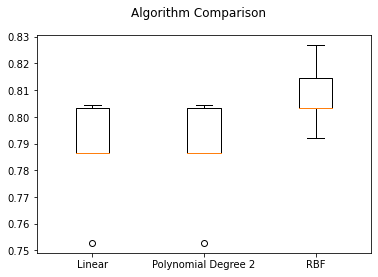

In [21]:
#Task 6
import pandas as pd; from sklearn import svm; import numpy as np; from sklearn import metrics;
import matplotlib.pyplot as plt; from sklearn.metrics import classification_report; from sklearn.model_selection import cross_val_score;

combined = [pd.read_csv('../Titanic/train_preprocessed.csv'), pd.read_csv('../Titanic/test_preprocessed.csv')]

yTrain = np.array(combined[0].Survived)
xTrain = np.array(combined[0].drop('Survived', 1))
xTest = np.array(combined[1])
yTest = np.array(pd.read_csv('../Titanic/gender_submission.csv').Survived)

scores_total = []
for kernel in ('linear', 'poly', 'rbf'):
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, degree=2)
    else:
        clf = svm.SVC(kernel=kernel)
    scores_total.append(cross_val_score(estimator=clf, X=xTrain, y=yTrain, cv=5))
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    print(kernel + ' classification report:')
    print(classification_report(yTest, yPred))

#Algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores_total)
ax.set_xticklabels(['Linear', 'Polynomial Degree 2', 'RBF'])
plt.show()
